In [1]:
#Basic required librariies
import pandas as pd
import numpy as np

#Visualization tools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Machine learning preprocessing and libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
#Data collection

bigmart = pd.read_csv(r'C:\Users\manoj.n.d\Documents\Data Scientist work\bigmart_data_train.csv')
bigmart

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
#Checking regarding the null data present in dataframe
bigmart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
#Information of the dataframe
bigmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Categorical features
1.Item_Identifier
2.Item_Fat_Content
3.Item_Type
4.Outlet_Identifier
5.Outlet_Size
6.Outlet_Location_Type
7.Outlet_Type

out of 12 there are 7 categorical and 5 are numerical values


In [5]:
bigmart[bigmart['Item_Weight'].isnull()]
#Item weight is the numerical value

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


#Missing values filling

mean--> Average
mode --> Most repeated values
This mean, median and mode is also called as imputationb


In [6]:
bigmart['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
6.775      2
9.420      1
6.520      1
5.400      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [7]:
#Finding the mean values of the item_weight
bigmart['Item_Weight'].mean()

12.857645184136183

In [8]:
#Filling the Item_weight attribute with it's mean
bigmart['Item_Weight'].fillna(bigmart['Item_Weight'].mean(), inplace=True)


In [9]:
#The data present in the outlet size
bigmart['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [10]:
bigmart.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc =(lambda x:x.mode()[0]))

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [11]:
#With the help of the pivot_table we convert rows into column and replace with mode
mode_outlet = bigmart.pivot_table(values='Outlet_Size',columns='Outlet_Type', aggfunc=(lambda x:x.mode()[0]))

In [12]:
mode_outlet.iloc[0]

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object

In [14]:
bigmart['Outlet_Size'].mode()[0]

'Medium'

In [15]:
bigmart.apply(lambda x: x.fillna(bigmart['Outlet_Size'].mode()[0], inplace=True))

Item_Identifier              None
Item_Weight                  None
Item_Fat_Content             None
Item_Visibility              None
Item_Type                    None
Item_MRP                     None
Outlet_Identifier            None
Outlet_Establishment_Year    None
Outlet_Size                  None
Outlet_Location_Type         None
Outlet_Type                  None
Item_Outlet_Sales            None
dtype: object

In [16]:
#There is no missing values in the dataset
bigmart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
#Statistical measure about the data
bigmart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [18]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
bigmart['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

C:\Users\manoj.n.d\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


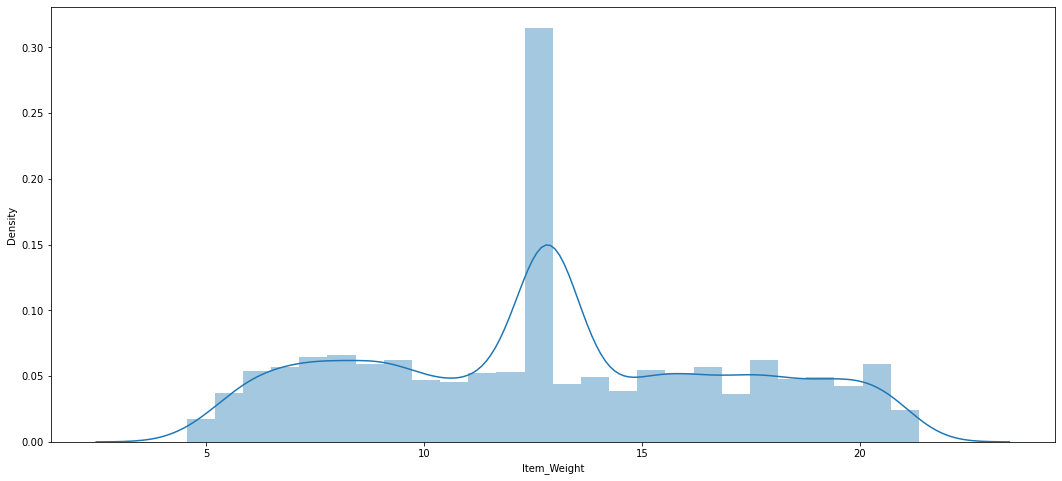

In [20]:
#Item weight distribution
plt.figure(figsize=(18,8))
sns.distplot(bigmart['Item_Weight'])
plt.show()

#This is the bell curve which we expectin stastical measure

C:\Users\manoj.n.d\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


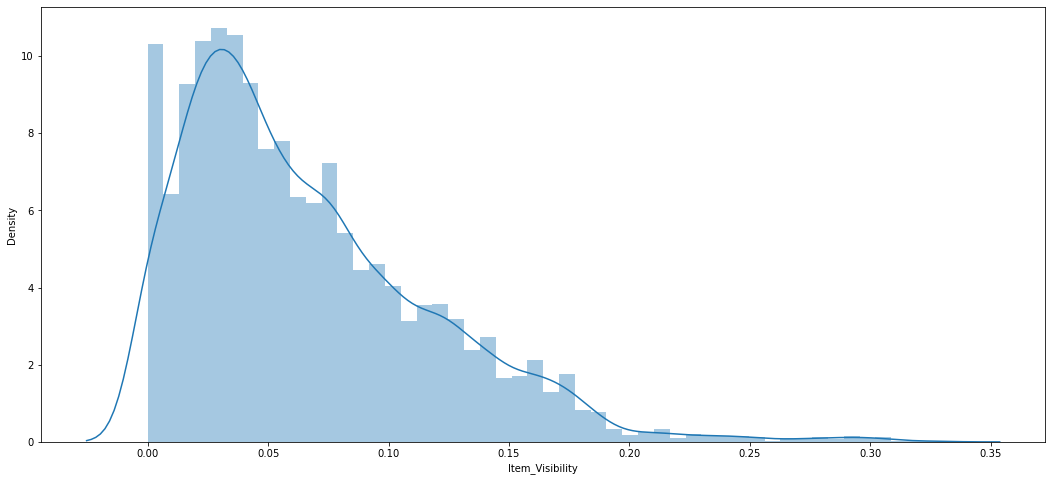

In [21]:
plt.figure(figsize=(18,8))
sns.distplot(bigmart['Item_Visibility'])
plt.show()
#This is the left skew

C:\Users\manoj.n.d\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


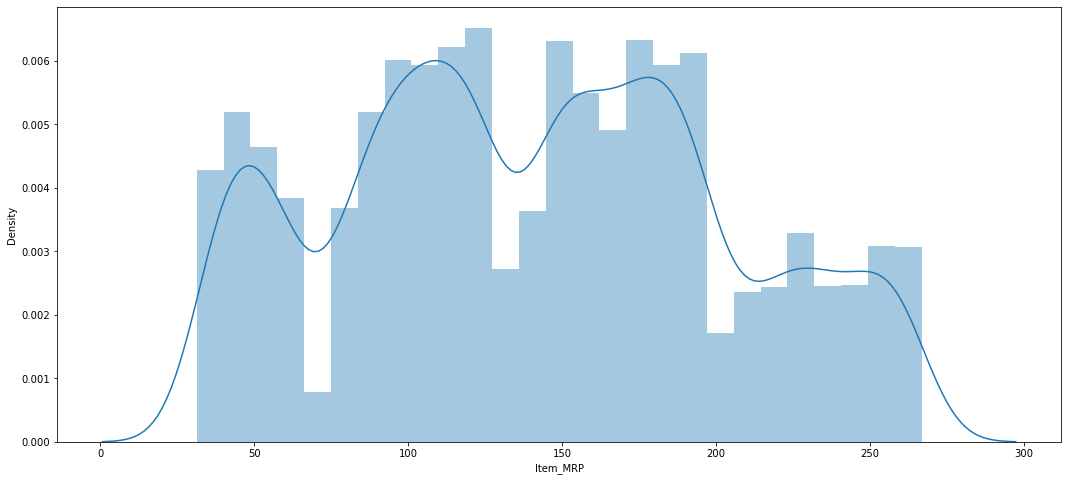

In [22]:
plt.figure(figsize=(18,8))
sns.distplot(bigmart['Item_MRP'])
plt.show()
#This is not the normal distribution 

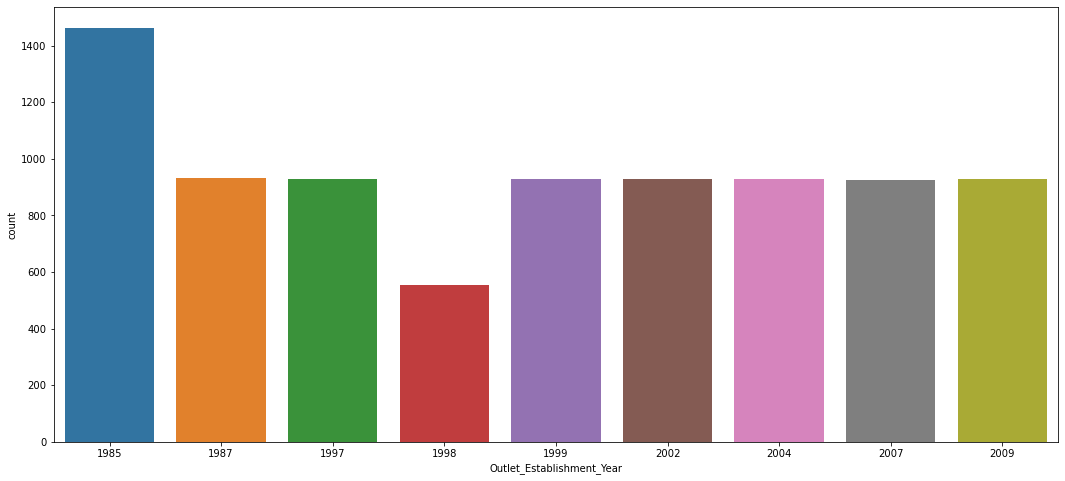

In [23]:
#Outlet establishment 
plt.figure(figsize=(18,8))
sns.countplot(x='Outlet_Establishment_Year', data=bigmart)
plt.show()


In [24]:
#Lets convert this multiple thing into 2 catogorical values
bigmart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [25]:
bigmart.replace({'Item_Fat_Content': {'Low Fat':'low fat',
                                      'LF':'low fat',
                                     'reg':'Regular'}}, inplace=True)

In [26]:
bigmart['Item_Fat_Content'].value_counts()

low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [27]:
#Lets do the label encoding
encoder = LabelEncoder()

In [28]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [29]:
attribute = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']

In [30]:
def label_encoder(attribute):
    for label in range(len(attribute)):
        i = attribute[label]
        bigmart[i] = encoder.fit_transform(bigmart[i])

In [31]:
label_encoder(attribute)

In [32]:
bigmart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,0,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,0,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [33]:
#Finally convertd all the data into numbercal format
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [34]:
#Lets split the data into x and y
x = bigmart.drop(columns='Item_Outlet_Sales',axis=1)
y=bigmart['Item_Outlet_Sales']

In [35]:
#Train and split the data
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=20 )

In [36]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [37]:
print(y.shape, y_train.shape, y_test.shape)

(8523,) (6818,) (1705,)


In [38]:
#Machine learnin model training with XGBoost
pipeline_ml = make_pipeline(StandardScaler(),XGBRegressor())

In [39]:
pipeline_ml

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=None, gpu_id=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=None,
                              max_leaves=None, min_child_weight=None,
                              missing=nan, monotone_constraints=None,
                              n_estimators=100, n_jobs=None,
                              num_parallel_tree=None, predictor

In [40]:
pipeline_ml.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
             

In [41]:
#Training evaluation
training_data_prediction=pipeline_ml.predict(x_train)

#Test evaluation
test_data_prediction = pipeline_ml.predict(x_test)

In [42]:
#R squared value for training data
r2_train = metrics.r2_score(y_train,training_data_prediction)
print(r2_train)

0.8539702474053802


In [43]:
#R squared value for test data
r2_test = metrics.r2_score(y_test, test_data_prediction)
print(r2_test)

0.525483840367563


In [44]:
# Use the forest's predict method on the test data
predictions = pipeline_ml.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')



Mean Absolute Error: 815.03 degrees.
Accuracy: 37.12 %.


:) Over fitting has happened buddy and this has performed worst

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
#lets try Random Forest Regressor
pipeline_ml1 = make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=500, random_state=4))
pipeline_ml1.fit(x_train,y_train)
#Training evaluation
training_data_prediction=pipeline_ml1.predict(x_train)

#Test evaluation
test_data_prediction = pipeline_ml1.predict(x_test)

In [47]:
#R squared value for test data
r2_test = metrics.r2_score(y_test, test_data_prediction)
print(r2_test)

0.5779792655172393


In [48]:
rf = RandomForestRegressor()

In [49]:
# Use the forest's predict method on the test data
predictions = pipeline_ml1.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 773.38 degrees.


In [50]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 42.2 %.


In [51]:
#Need to do some more model and hyper parameter tuning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
#Cross validation
from sklearn.model_selection import cross_val_score,KFold

from sklearn.metrics import *

In [52]:

models = [LinearRegression(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         SVR(),
         KNeighborsRegressor(),
         GradientBoostingRegressor(),
         XGBRegressor()]

In [53]:
kf = KFold(n_splits=5)

In [54]:
def select_model(models,x=x, y=y):
    for m in range(len(models)):
        cross_val_scoring = cross_val_score(estimator=models[m], X=x, y=y,cv=kf, n_jobs=-1 )
        models[m].fit(x_train,y_train)
        predicting_test = models[m].predict(x_test)
        print(f'r2_score of model {models[m]} is: {r2_score(predicting_test,y_test)}')
        print(f'Mean absolute error of {models[m]} is:{mean_absolute_error(predicting_test,y_test)}')
        print(f'mean squared error of {models[m]} is :{mean_squared_error(predicting_test,y_test)}')
        print(f'rmse of {models[m]} is :{np.sqrt(mean_squared_error(predicting_test,y_test))}')
        print(f'The model {models[m]} mean accuracy is :{np.mean(cross_val_scoring)}')
        print('*'*30)

In [55]:
select_model(models)

r2_score of model LinearRegression() is: 0.12059887326995167
Mean absolute error of LinearRegression() is:881.2245353059226
mean squared error of LinearRegression() is :1365702.5362767356
rmse of LinearRegression() is :1168.6327636502135
The model LinearRegression() mean accuracy is :0.5079269803701083
******************************
r2_score of model DecisionTreeRegressor() is: 0.2416896168965197
Mean absolute error of DecisionTreeRegressor() is:1089.536206920821
mean squared error of DecisionTreeRegressor() is :2431916.920499919
rmse of DecisionTreeRegressor() is :1559.4604581392628
The model DecisionTreeRegressor() mean accuracy is :0.17076237340770076
******************************
r2_score of model RandomForestRegressor() is: 0.3945642296058862
Mean absolute error of RandomForestRegressor() is:779.454074972434
mean squared error of RandomForestRegressor() is :1210955.3597155553
rmse of RandomForestRegressor() is :1100.4341687332121
The model RandomForestRegressor() mean accuracy is

#Verdict.

We need more data and we have to reduce few attributes.
Only Random Forest and XGBRegressor gave above 50% accuracy